In [5]:
import geopandas as gpd
import pandas as pd

In [6]:
states = gpd.read_file("../../data/states_21basic/states.shp")

In [7]:
tweets = pd.read_pickle("../../data/cp_tweets.pkl")

In [8]:
# only look at USA places. Exclude country, neightborhood ad poi which are negligible
logic = (tweets.country == "United States") & \
        (tweets.place_place_type != "poi") & \
        (tweets.place_place_type != "country") & \
        (tweets.place_place_type != "neighborhood")

In [10]:
tweets_USD = tweets[logic]

In [11]:
# add helper lib to kernal running
import os
import sys

lib_dir = "../../libs/"
if lib_dir not in sys.path:
    sys.path.append(lib_dir)

In [12]:
# import helper lib
import DSF_helpers

In [13]:
tweets_USA["state_abrv"] = tweets_USD.place_full_name.apply(DSF_helpers.get_state_ABRV)

could not find:  Pueblo Viejo, Puerto Rico
could not find:  Mayagüez, Puerto Rico
could not find:  Mayagüez, Puerto Rico
could not find:  Mayagüez, Puerto Rico
could not find:  Caguas, Puerto Rico
could not find:  El Cinco, Puerto Rico
could not find:  Mayagüez, Puerto Rico
could not find:  Mayagüez, Puerto Rico
could not find:  Mayagüez, Puerto Rico
could not find:  El Cinco, Puerto Rico
could not find:  El Cinco, Puerto Rico
could not find:  Pueblo Viejo, Puerto Rico
could not find:  El Cinco, Puerto Rico
could not find:  Arecibo, Puerto Rico
could not find:  Charlotte Amalie, Virgin Islands
could not find:  El Cinco, Puerto Rico
could not find:  El Cinco, Puerto Rico
could not find:  El Cinco, Puerto Rico
could not find:  Arecibo, Puerto Rico
could not find:  Navarro, Puerto Rico
could not find:  El Cinco, Puerto Rico
could not find:  El Cinco, Puerto Rico
could not find:  Arecibo, Puerto Rico
could not find:  Arecibo, Puerto Rico
could not find:  Arecibo, Puerto Rico
could not find

/Users/jeroen/anaconda3/envs/uva-DS-fundementals/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
x = tweets_USA[["state_abrv","tweet_id"]].groupby("state_abrv").count()
x = x.rename(columns={"tweet_id":"count"}).reset_index()

In [49]:
states = states.merge(x,how="inner",left_on="STATE_ABBR",right_on="state_abrv").drop(columns=["state_abrv"])

<IPython.core.display.Javascript object>


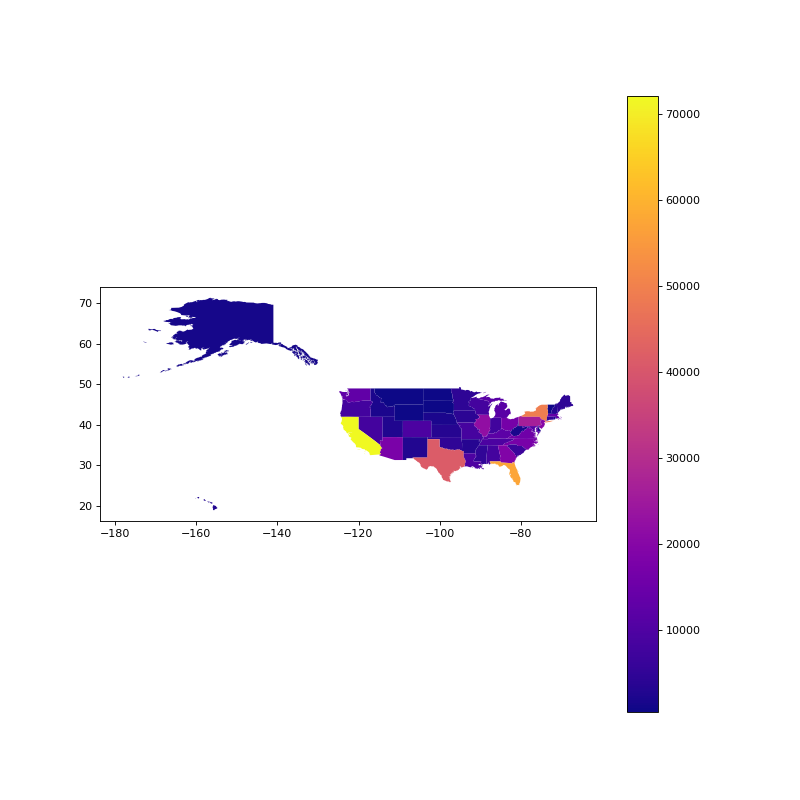

In [54]:
% matplotlib notebook
states.plot(figsize=(10,10),column="count",cmap="plasma",legend=True)